# Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Matplotlib 
%matplotlib inline

# Seabron
sns.set(rc={'figure.figsize':(16,10)})
sns.set_style('whitegrid')

# Loading the data

In [2]:
df = pd.read_csv('healthcare-dataset-stroke-data.csv')
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


1) id: unique identifier

2) gender: "Male", "Female" or "Other"

3) age: age of the patient

4) hypertension: 0 if the patient doesn't have hypertension, 1 if the patient has hypertension

5) heart_disease: 0 if the patient doesn't have any heart diseases, 1 if the patient has a heart disease

6) ever_married: "No" or "Yes"

7) work_type: "children", "Govt_jov", "Never_worked", "Private" or "Self-employed"

8) Residence_type: "Rural" or "Urban"

9) avg_glucose_level: average glucose level in blood

10) bmi: body mass index

11) smoking_status: "formerly smoked", "never smoked", "smokes" or "Unknown"*

12) stroke: 1 if the patient had a stroke or 0 if not

Note: "Unknown" in smoking_status means that the information is unavailable for this patient

In [3]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# Data cleaning 

Since the 'id' column is not needed for this analysis as well as for the implementation of learning algorithms, I will remove it in this instance.

In [5]:
df.drop('id', axis=1, inplace=True)

With the implementation of a heatmap it will be easier to visualize which feature has the presence of missing data.

<AxesSubplot:>

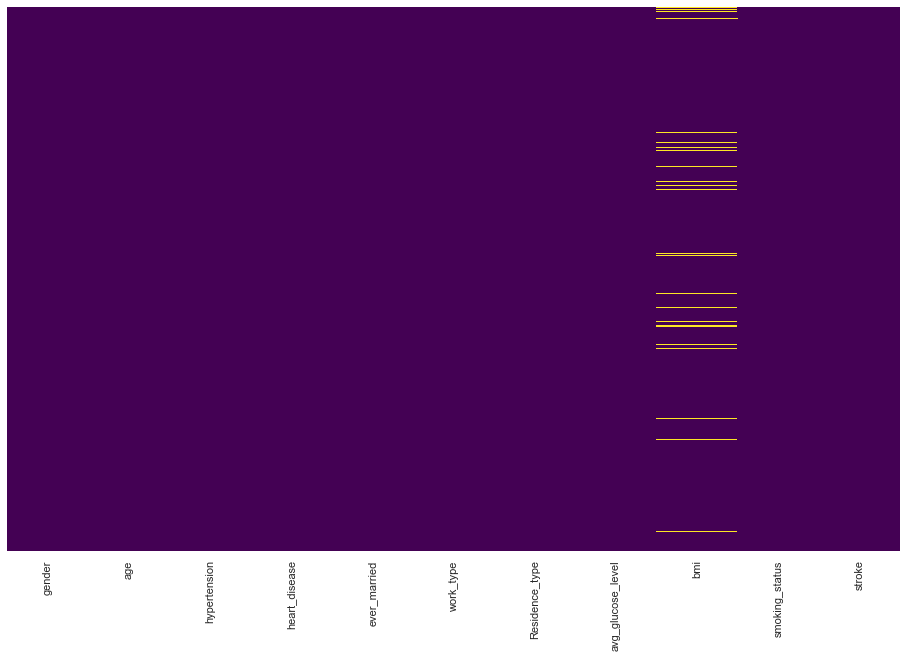

In [6]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

For the data cleaning process I will focus on the following features:
- Gender: since this analysis focuses on gender from a biological point of view.
- BMI: since there is the presence of missing data.
- Smoking status: since it presents data with the 'Unknown' characteristic.

#### Gender

In [7]:
df['gender'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Since it's only one case where gender falls in the 'Other' category and in this project gender is not important, but the biological difference between male and female, this data will be eliminated.

In [8]:
g_other_index = df[df['gender']=='Other'].index
df.drop(index=g_other_index, inplace=True)
df['gender'].value_counts()

Female    2994
Male      2115
Name: gender, dtype: int64

#### Bmi

In [9]:
bmi_na_values = df['bmi'].isna().sum()
total_values = df.index.max()

percentage_of_loss = (bmi_na_values*100)/total_values

print('The percentage of data that will be lost if removing missing values in column bmi is {:.1f}%.'.format(percentage_of_loss))

if percentage_of_loss < 5:
    print('Since the percentage is less than 5%, the na values will be removed.')
    df.dropna(inplace=True)
else:
    print('Since the percentage is over than 5%, the na values will be filled.')

The percentage of data that will be lost if removing missing values in column bmi is 3.9%.
Since the percentage is less than 5%, the na values will be removed.


#### Smoking

In [10]:
smoking_unknown_count = df['smoking_status'][(df['smoking_status']=='Unknown')].count()
percentage_snoking_unknown = (smoking_unknown_count*100)/len(df)

print('The percentage of Unknown smokers is {:.2f}%'.format(percentage_snoking_unknown))

The percentage of Unknown smokers is 30.22%


<AxesSubplot:xlabel='stroke', ylabel='count'>

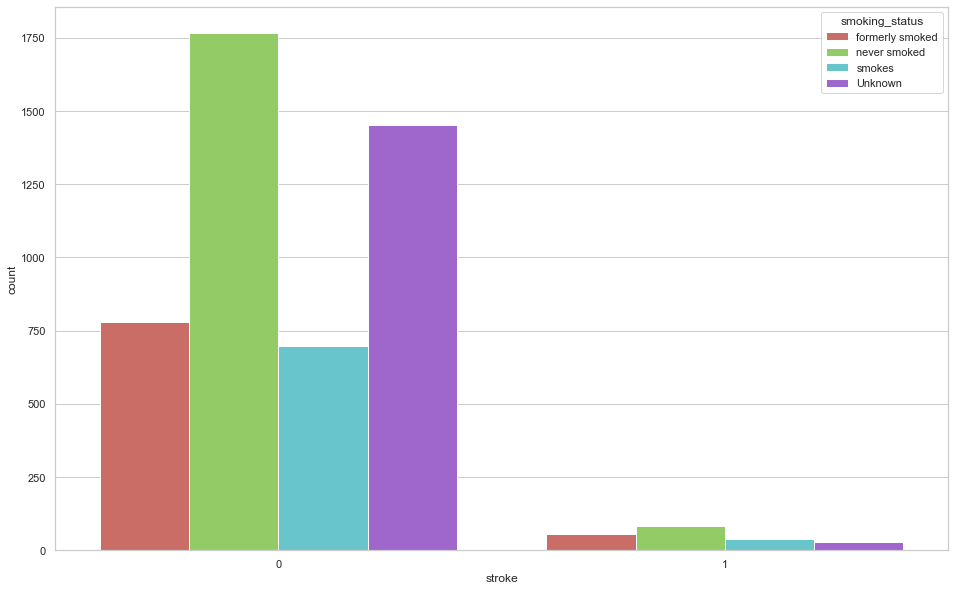

In [11]:
sns.countplot(x='stroke', data=df, hue='smoking_status', palette='hls')

Since the total percentage of the 'smoking_status' feature with the 'Unknown' category represents 30.22% of the data and in addition it is not a strong predictor parameter of the 'stroke = 1 (positive)' category because it represents the least number of cases, it is decided not to delete this data.

# Exploratory Analysis

For this exploratory analysis I will focus in 5 topics:
- Balance in stroke, with the hue set on  gender and age.
- Determine the balance of the 'Residence_type' feature.
- Study the correlation between the 'hypertension', 'heart_disease' and 'avg_glucose_level' features.
- Analyze the correlation between the features of the entire dataset.
- How the probability of passing to the positive category of stroke changes as the BMI value increases.

## Topic 1: Balance

### Gender

<AxesSubplot:xlabel='gender', ylabel='count'>

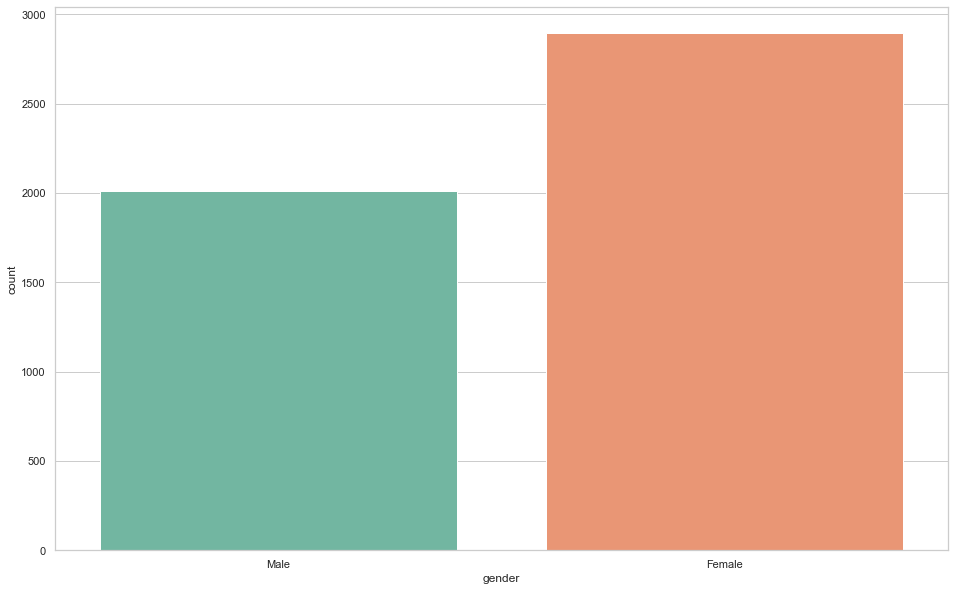

In [12]:
sns.countplot(x='gender', data=df, palette='Set2')

In [13]:
male_count = df['gender'][(df['gender']=='Male')].count()
female_count = df['gender'][(df['gender']=='Female')].count()

male_count_percentage = (male_count*100)/len(df)
female_count_percentage = (female_count*100)/len(df)

print('The percentage of males is {:.2f}%, an the percentage of females is {:.2f}%.'.format(male_count_percentage, female_count_percentage))
print('With a total count of {} males and {} females. Which leave a diference of {} cases.'.format(male_count, female_count, female_count-male_count))

The percentage of males is 40.97%, an the percentage of females is 59.03%.
With a total count of 2011 males and 2897 females. Which leave a diference of 886 cases.


Despite the difference on the amount of cases between males and females, these last only represent 18% more, which should not bias this analysis.

<AxesSubplot:xlabel='stroke', ylabel='count'>

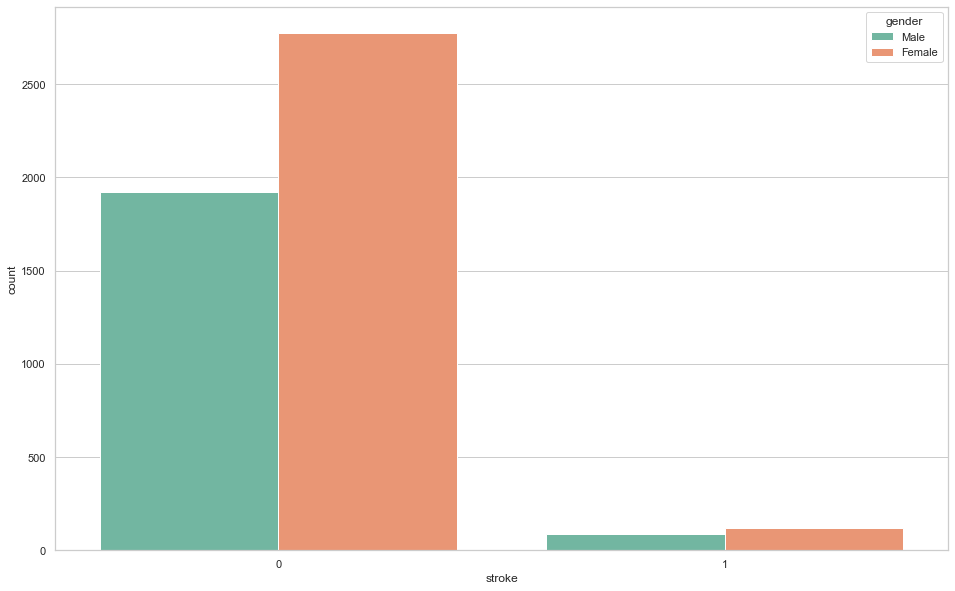

In [14]:
sns.countplot(x='stroke', data=df, hue='gender', palette='Set2')

Based on a visual analysis from the plot above, the are more females in the stroke category and outside of it aswell. 

From here the question opens: women also have a majority in the category 'heart_disease', 'hypertension' and have more elevated bmi and glucose levels?

Let's find out.

#### Heart desease - women analysis

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

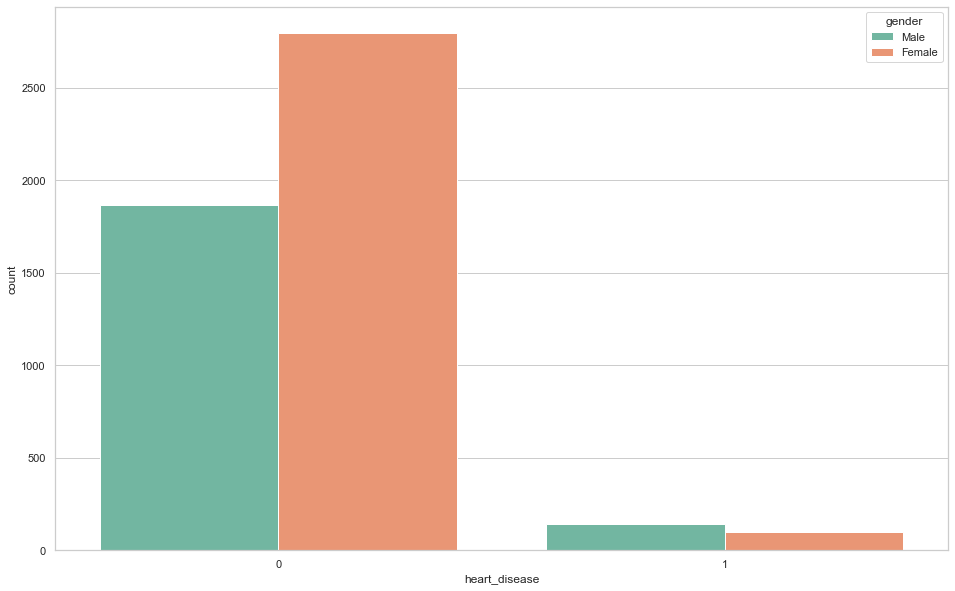

In [15]:
sns.countplot(x='heart_disease', data=df, hue='gender', palette='Set2')

There are more women with with a heart condition in the negative stroke category, but more men in the positive stroke category.

#### Hypertension - women analysis

<AxesSubplot:xlabel='hypertension', ylabel='count'>

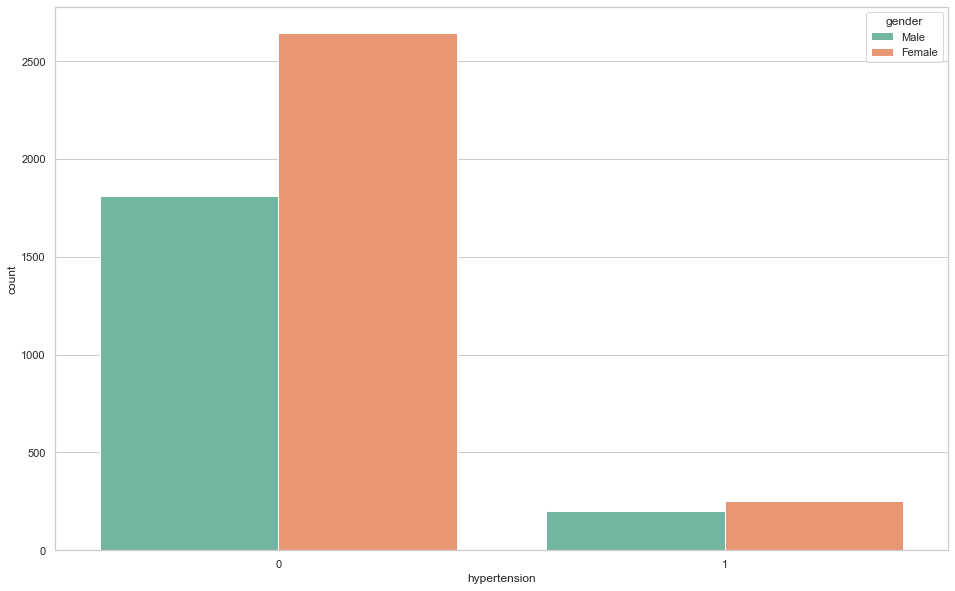

In [16]:
sns.countplot(x='hypertension', data=df, hue='gender', palette='Set2')

Women with hypertension predominate in quantity in both categories (positive and negative) of stroke.

#### BMI - women analysis

<AxesSubplot:xlabel='bmi', ylabel='Count'>

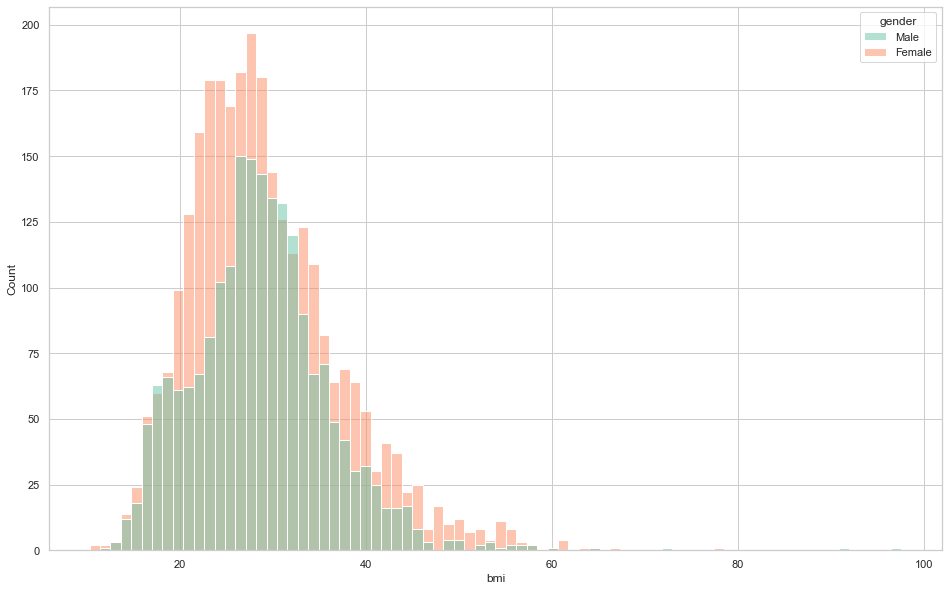

In [17]:
sns.histplot(x='bmi', data=df, hue='gender', palette='Set2')

#### Glucose levels- women analysis

<AxesSubplot:xlabel='avg_glucose_level', ylabel='Count'>

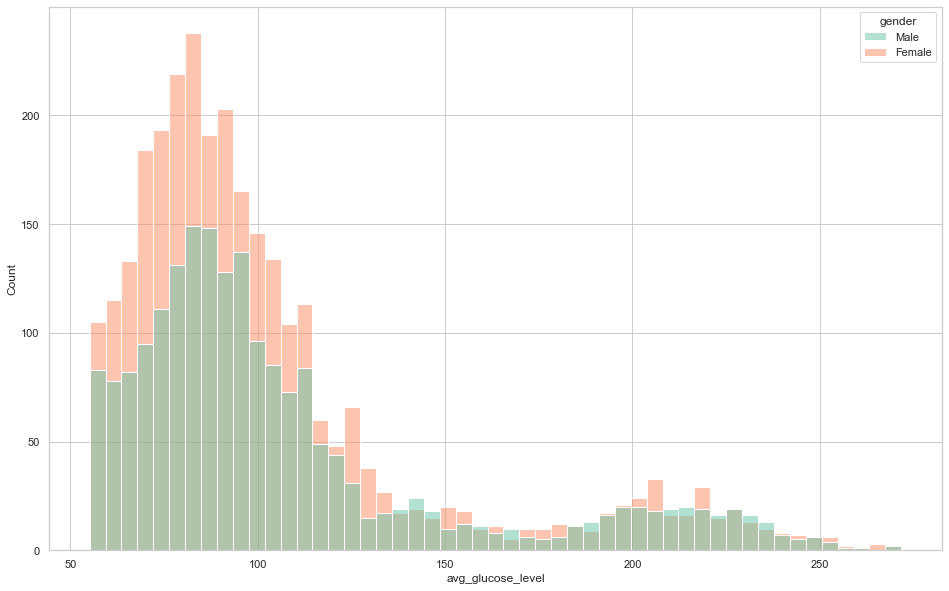

In [18]:
sns.histplot(x='avg_glucose_level', data=df, hue='gender', palette='Set2')

As we go up in the x values, both in the bmi plot and the average glucose levels plot, women predominate and represent more cases than men.

In conclusion, women are the majority in almost all the analyzes carried out, both for the positive and negative category of stroke.

However what is more interesting is to concentrate on the positive kind of stroke; here there is no big difference between men and women, and this is supported by science.
A superficial study of specialized papers on this topic indicates that: "**Age-specific stroke rates are higher in men, but, because of their longer life expectancy and much higher incidence at older ages, women have more stroke events than men. (1)**" and in addition "**While premenopausal women experience fewer strokes than men of comparable age, stroke rates increase among postmenopausal women compared with age-matched men. (2)**".

(1) https://www.sciencedirect.com/science/article/abs/pii/S1474442208701935

(2) https://journals.sagepub.com/doi/full/10.1038/jcbfm.2012.141

## Topic 2: Residence type

<AxesSubplot:xlabel='stroke', ylabel='count'>

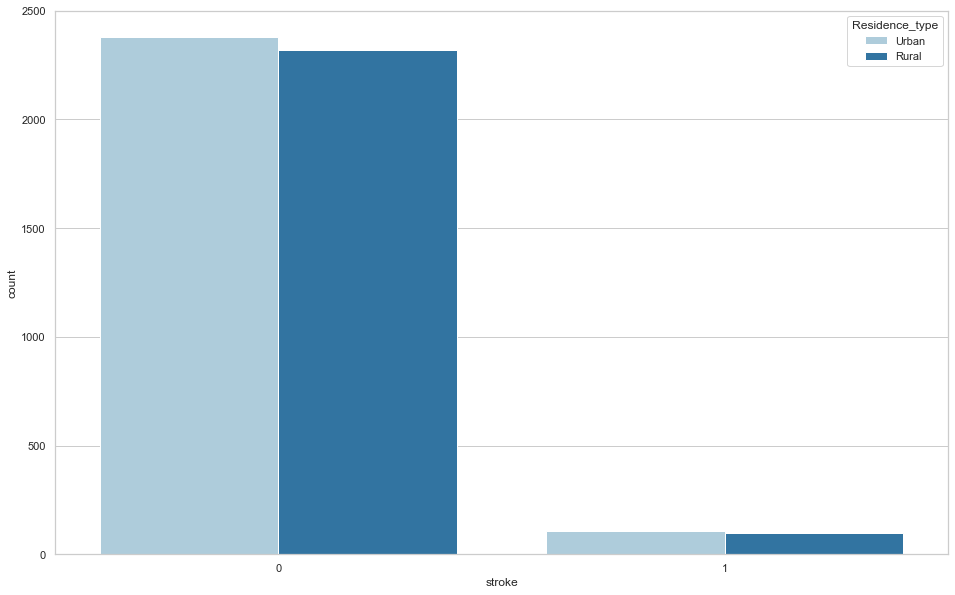

In [19]:
sns.countplot(x='stroke', data=df, hue='Residence_type', palette='Paired')

Based on the result of the graph above it is safe to say that, at least with the data from this dataset, that there is a small difference between people who live in urban areas versus those who live in rural areas, being those who belong to the first group most in both the positive and negative category of storke.

This could indicate that people who live in urban areas have a greater predisposition to suffer a stroke.

## Topic 3: Correlation between heart disease, hypertension and avarege glucose levels

<AxesSubplot:>

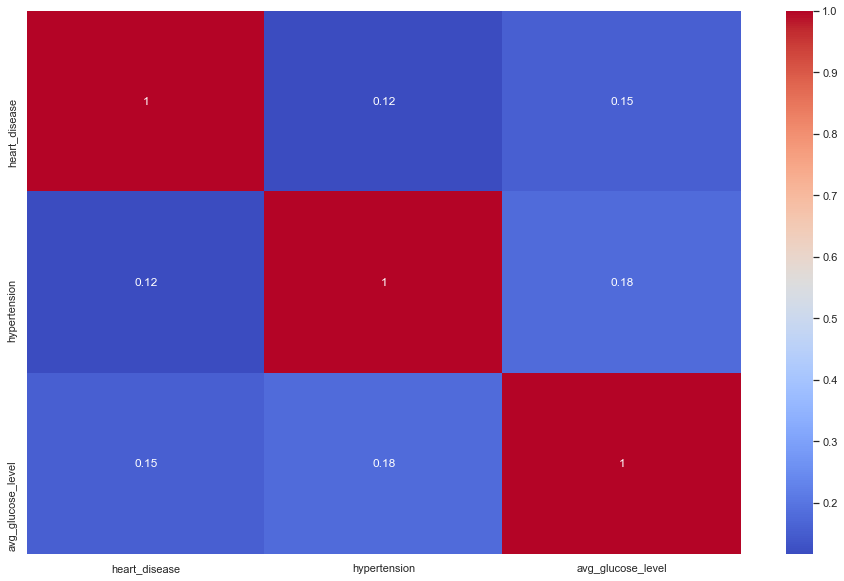

In [20]:
heart_disease = df['heart_disease']
hypertension = df['hypertension']
glucose_lvls = df['avg_glucose_level']
d = [heart_disease, hypertension, glucose_lvls]

df_corr = pd.DataFrame(data=d)
df_corr = df_corr.transpose()

sns.heatmap(df_corr.corr(),cmap='coolwarm',annot=True)

Here goes the conclusion

## Topic 4: Correlation of the dataset

<AxesSubplot:>

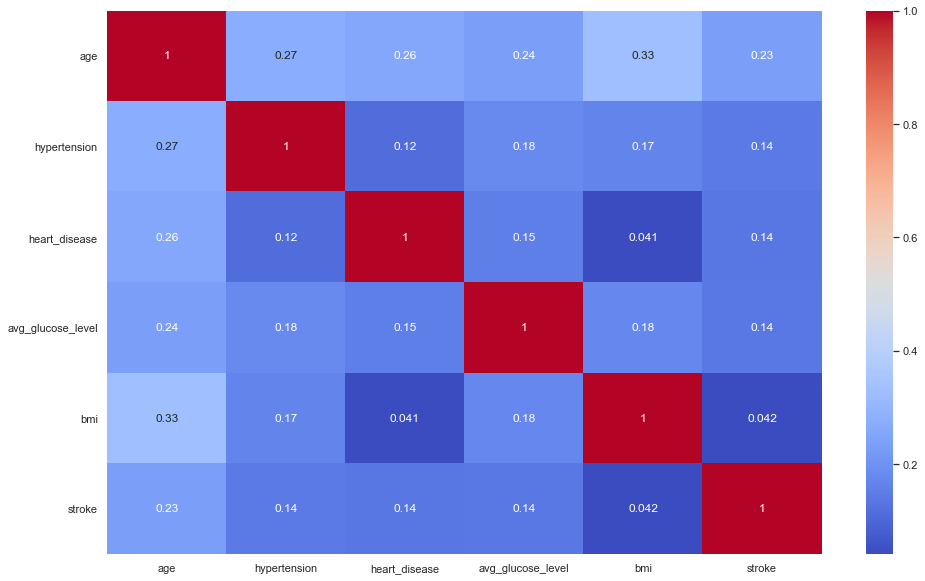

In [21]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)

Studying the map above, it is evident that the highest correlation exists between the 'Age' category and the rest of the features, although for this dataset there is no correlation beyond 0.33 due to the random component of the disease being treated. this project.

## Topic 5: BMI and Stroke

Based on this chart I will make the segmentation (poner algo mas academico)

url: https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html

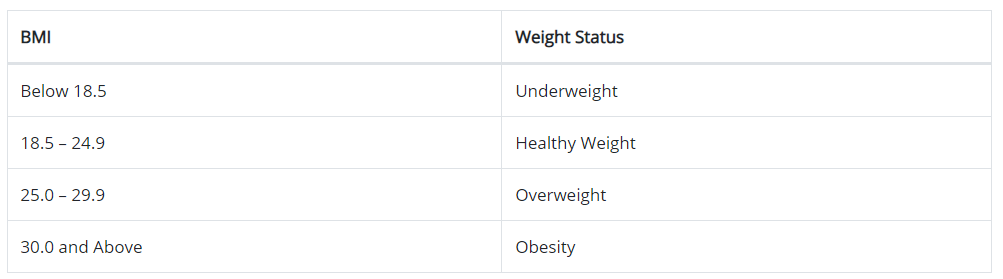

In [22]:
underweight_bmi = df['stroke'][df['bmi']<18.5]
heavyweight_bmi = df['stroke'][df['bmi']>=18.5][df['bmi']<24.9]
overweith_bmi = df['stroke'][df['bmi']>25][df['bmi']<29.9]
obesity_bmi = df['stroke'][df['bmi']>30]

Text(0.5, 1.0, 'Obesity')

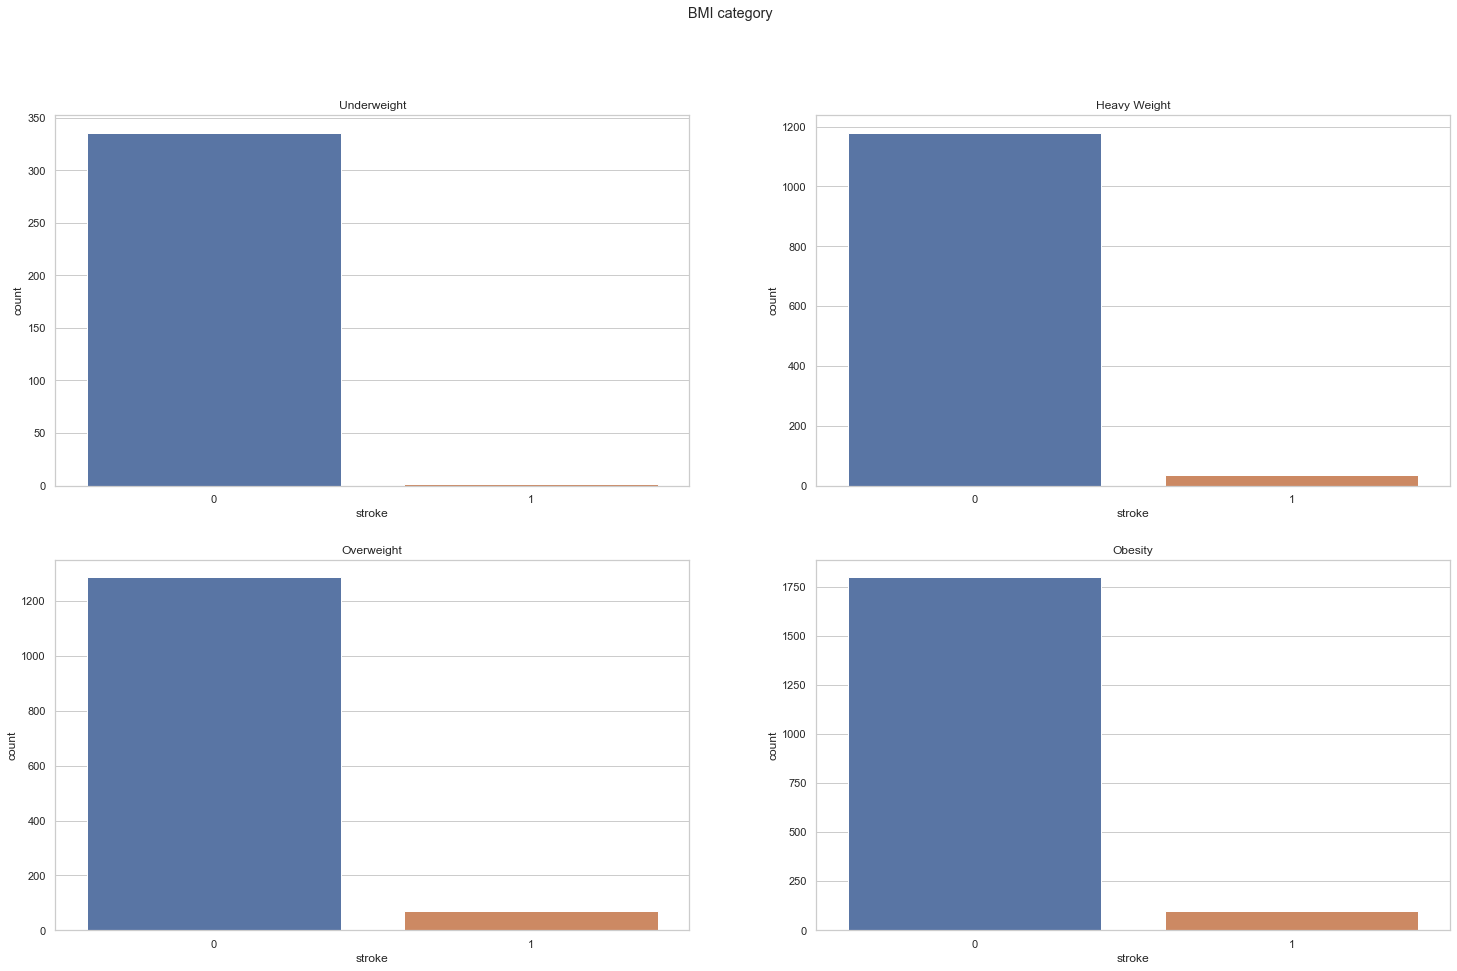

In [23]:
fig, axes = plt.subplots(2, 2, figsize=(25, 15))
fig.suptitle('BMI category')

# Underweight
sns.countplot(ax=axes[0,0], x=underweight_bmi, data=df, orient='v')
axes[0,0].set_title('Underweight')

# Heavy weight
sns.countplot(ax=axes[0,1], x=heavyweight_bmi, data=df, orient='v')
axes[0,1].set_title('Heavy Weight')

# Overweight
sns.countplot(ax=axes[1,0], x=overweith_bmi, data=df, orient='v')
axes[1,0].set_title('Overweight')

# Obesity
sns.countplot(ax=axes[1,1], x=obesity_bmi, data=df, orient='v')
axes[1,1].set_title('Obesity')

In [24]:
underweight_bmi_positive_stroke = df['stroke'][df['stroke']==1][df['bmi']<18.5].count()
heavyweight_bmi_positive_stroke = df['stroke'][df['stroke']==1][df['bmi']>=18.5][df['bmi']<24.9].count()
overweight_bmi_positive_stroke = df['stroke'][df['stroke']==1][df['bmi']>25][df['bmi']<29.9].count()
obesity_bmi_positive_stroke = df['stroke'][df['stroke']==1][df['bmi']>30].count()

bmi_positive_stroke_count = [underweight_bmi_positive_stroke, heavyweight_bmi_positive_stroke, overweight_bmi_positive_stroke, obesity_bmi_positive_stroke]

df_bmi_positive_stroke = pd.DataFrame(data = bmi_positive_stroke_count, index='Underweight HeavyWeight Overweight Obesity'.split(' '))

df_bmi_positive_stroke = df_bmi_positive_stroke.transpose()

df_bmi_positive_stroke

,Underweight,HeavyWeight,Overweight,Obesity
0,1,35,70,96


The result of the analysis of this section yields the expected results, being that as the BMI increases, the number of people who suffered a stroke increases.

Although a high BMI does not strongly indicate that a person is going to suffer this event, it is more likely.

# Applying Machine learning algorithms

The purpose of applying different types of machine learning algorithms is to evaluate which of them generates better predictions, rank them and select the one with the best characteristics.

## Dummy variables

First of all, it is necessary to generate dummy variables so that the algorithms can process this information, since the problem presented by the dataset is one of categorization. Those that will be converted are:
- Gender
- Ever married
- Work type
- Residence type
- Smoking status

In [25]:
sex = pd.get_dummies(data=df['gender'], drop_first=True)
married = pd.get_dummies(data=df['ever_married'], prefix='married', drop_first=True)
work = pd.get_dummies(data=df['work_type'], drop_first=True)
residence = pd.get_dummies(data=df['Residence_type'], drop_first=True)
smoker = pd.get_dummies(data=df['smoking_status'], drop_first=True)

df.drop(['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status'],axis=1,inplace=True)
df = pd.concat([df,sex, married, work, residence, smoker],axis=1)
df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,Male,married_Yes,Never_worked,Private,Self-employed,children,Urban,formerly smoked,never smoked,smokes
0,67.0,0,1,228.69,36.6,1,1,1,0,1,0,0,1,1,0,0
2,80.0,0,1,105.92,32.5,1,1,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,1,0,0,1,0,0,0,1,0
5,81.0,0,0,186.21,29.0,1,1,1,0,1,0,0,1,1,0,0


## Train Test Split

In [26]:
from sklearn.model_selection import train_test_split

In [27]:
X = df.drop('stroke', axis=1)
y = df['stroke']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Before carrying out the next step in preparing the data to apply machine learning algorithms, it is first necessary to make sure that there are positive cases of stroke in the data partition.

In [29]:
y_train.value_counts()

0    3298
1     137
Name: stroke, dtype: int64

In [30]:
y_test.value_counts()

0    1401
1      72
Name: stroke, dtype: int64

## Scaling the Data

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [32]:
scaler = MinMaxScaler() # Create a variable for the scaling

scaler.fit(X_train) # Fit the train data from the previus split to the scaler

X_train = scaler.transform(X_train) # Recreate the X_train to the scaled X_train and perform the transformation

X_test = scaler.transform(X_test)

X_train.max() # Test

1.0

## Classification Report and Confusion Matrix

Importing the libraries for the future reports

In [33]:
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score

# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression

In [35]:
# Creating and training the model
logmodel = LogisticRegression() # To create the model
logmodel.fit(X_train,y_train) # To train the model

predictions = logmodel.predict(X_test)

# Evaluation
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[1401    0]
 [  72    0]]


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1401
           1       0.00      0.00      0.00        72

    accuracy                           0.95      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.90      0.95      0.93      1473



C:\Users\Trolo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Trolo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Trolo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# KNN

In [36]:
from sklearn.neighbors import KNeighborsClassifier

First of all, it's necessary to choose the correct neighbors value

Text(0, 0.5, 'Error Rate')

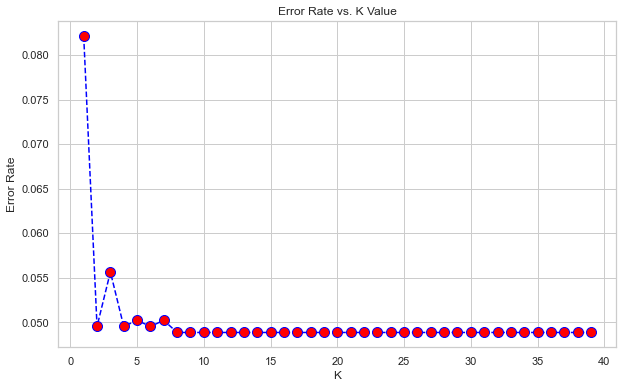

In [37]:
# Choosing the number of neighbors
error_rate = []

for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

# Plotting the figure
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [38]:
# Creating and training the model
knn = KNeighborsClassifier(n_neighbors=8)

knn.fit(X_train,y_train) # To train the model
pred = knn.predict(X_test) # To test the model

# Evaluation
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[1401    0]
 [  72    0]]


              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1401
           1       0.00      0.00      0.00        72

    accuracy                           0.95      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.90      0.95      0.93      1473



C:\Users\Trolo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Trolo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Trolo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Random Forest

In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
# Creating and training the model
dtree = DecisionTreeClassifier() # To create the model
dtree.fit(X_train,y_train) # To train the model

predictions = dtree.predict(X_test) # To test the model

# Evaluation
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[1340   61]
 [  58   14]]


              precision    recall  f1-score   support

           0       0.96      0.96      0.96      1401
           1       0.19      0.19      0.19        72

    accuracy                           0.92      1473
   macro avg       0.57      0.58      0.57      1473
weighted avg       0.92      0.92      0.92      1473



# Neural Network

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

In [42]:
model = Sequential() # To create the model

model.add(Dense(14, activation='relu')) # Input Layer
model.add(Dropout(0.5)) 

model.add(Dense(1000, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1000, activation='relu')) 
model.add(Dropout(0.5))

model.add(Dense(500, activation='relu')) 
model.add(Dropout(0.5))

model.add(Dense(1)) # Output Layer

model.compile(optimizer='rmsprop', loss='mse')

early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test, y_test), callbacks=[early_stop])

Epoch 1/600
108/108 [==============================] - 1s 12ms/step - loss: 0.0509 - val_loss: 0.0462
Epoch 2/600
108/108 [==============================] - 1s 11ms/step - loss: 0.0403 - val_loss: 0.0458
Epoch 3/600
108/108 [==============================] - 1s 11ms/step - loss: 0.0400 - val_loss: 0.0460
Epoch 4/600
108/108 [==============================] - 1s 11ms/step - loss: 0.0393 - val_loss: 0.0464
Epoch 5/600
108/108 [==============================] - 1s 11ms/step - loss: 0.0392 - val_loss: 0.0472
Epoch 6/600
108/108 [==============================] - 1s 11ms/step - loss: 0.0391 - val_loss: 0.0459
Epoch 7/600
108/108 [==============================] - 1s 11ms/step - loss: 0.0393 - val_loss: 0.0464
Epoch 8/600
108/108 [==============================] - 1s 11ms/step - loss: 0.0394 - val_loss: 0.0470
Epoch 9/600
108/108 [==============================] - 1s 11ms/step - loss: 0.0393 - val_loss: 0.0467
Epoch 10/600
108/108 [==============================] - 1s 11ms/step - loss: 0.038

<AxesSubplot:>

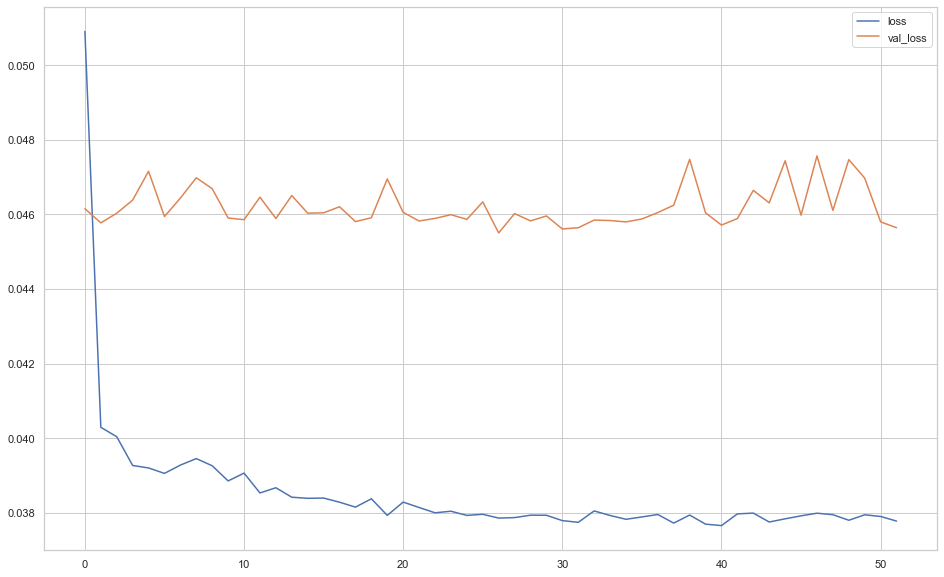

In [43]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [44]:
predictions = model.predict_classes(X_test)
print(classification_report(y_test, predictions))
print(confusion_matrix(y_test, predictions))

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
              precision    recall  f1-score   support

           0       0.95      1.00      0.97      1401
           1       0.00      0.00      0.00        72

    accuracy                           0.95      1473
   macro avg       0.48      0.50      0.49      1473
weighted avg       0.90      0.95      0.93      1473

[[1401    0]
 [  72    0]]


C:\Users\Trolo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Trolo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Trolo\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Final conclusion

Based on the results obtained by the previously applied machine learning algorithms, from my point of view, it is correct to state that none of them returned robust results.

Both the application of logistic regression, KNN and the use of a neural network were not able to determine positive cases of stroke with certainty, returning values of 0 in precision, recall and f1-score. And if we observe the evolution of the 'error rate' none manage to get below 0.045.
In addition, if we analyze the confusion matrix there is a high prevalence of false negatives, which is not a good thing (and in my opinion it would be preferable to have false positives).

Now, Random Forest was the only algorithm that was able to escape the performance of the previous three, returning better values both in the classification report and in the confusion matrix, where although there are a total of 124 cases between false negatives and false positives, it managed to classify cases within true negatives and although its accuracy (92%) is lower than that of, for example, that of the neural network (95%), its behavior is "more real".

In conclusion, everyone's learning could be improved, for example, by increasing the number of cases so as to increase the number of instances within the positive category of 'stroke'. It is also important to remember that the class division for this feature is very unbalanced.

It is necessary to keep in mind that suffering a stroke has a random component that medicine has not yet been able to quantify perfectly, as it has done for other diseases.